In [1]:
%pylab inline
%matplotlib inline

import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import csv_dic_df

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")

import paths
import espn_urls
import my_plot
import scrap_espn_gamecast


from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF
from useful_methods import PreprocessingTweet
from useful_methods import EmolexDic
from useful_methods import CreateEmolexDF

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Emolex
dic_emolex, dic_emolex_stemmed = EmolexDic()

All Words: 14182


In [3]:
# choosing data
week = str(13)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Chelsea_vs_Norwich.csv',
 'City_vs_Liverpool.csv',
 'Crystal_vs_Sunderland.csv',
 'Everton_vs_Villa.csv',
 'Newcastle_vs_Leicester.csv',
 'Southampton_vs_Stoke.csv',
 'Swansea_vs_Bournemouth.csv',
 'Tottenham_vs_WestHam.csv',
 'WestBromwich_vs_Arsenal.csv']

In [4]:
# Set Game
filename = filenames[1]

# Read DF
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filename)

# [Filter] DF
dfFilter = FilterDF(df)

# [Filtered] All, Non-Retweet
dfFilterEmolex = CreateEmolexDF(dfFilter, dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRetweet = CreateEmolexDF(dfFilter[dfFilter['status'] != 'retweet'], dic_emolex, dic_emolex_stemmed)

# [Filtered] Home, Away
dfFilterEmolexHome = CreateEmolexDF(dfFilter[dfFilter['side'] == 'home'], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexAway = CreateEmolexDF(dfFilter[dfFilter['side'] == 'away'], dic_emolex, dic_emolex_stemmed)

# [Filtered, Non ReTweet] Home, Away
dfFilterEmolexNonRtHome = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRtAway = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)

In [5]:
# Scrap Gamecast
url = espn_urls.MatchUrl(GW, filename)
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

# Create Goal, Attack, Foul dics
goals_dic, attacks_dic_home, attacks_dic_away, fouls_dic_home, fouls_dic_away = scrap_espn_gamecast.CreateGAFdics(dfGameCast)

[Match]: Manchester City VS Liverpool
[Scrap Done]: 1.54 sec


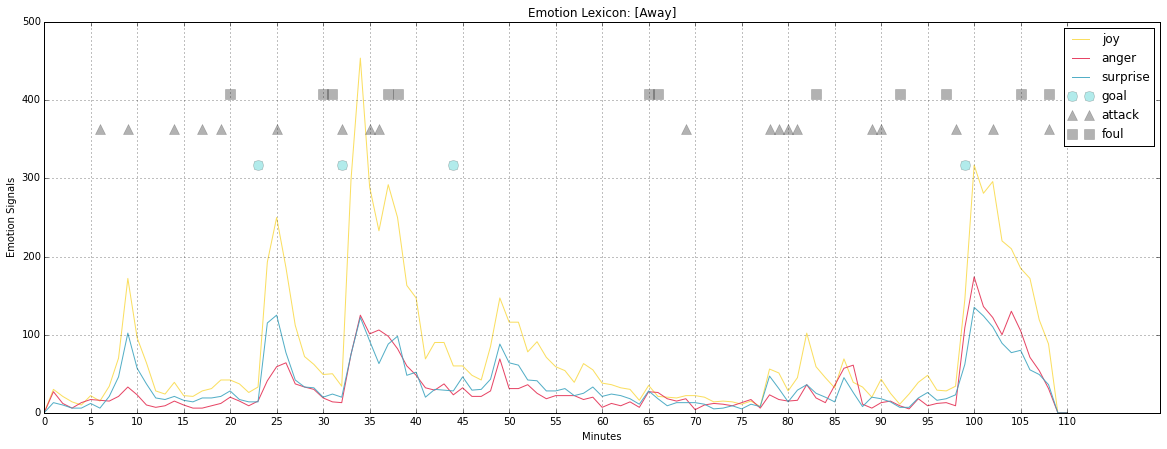

In [6]:
my_plot.EmolexCats(dfFilterEmolexNonRtAway, ['joy', 'anger', 'surprise'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

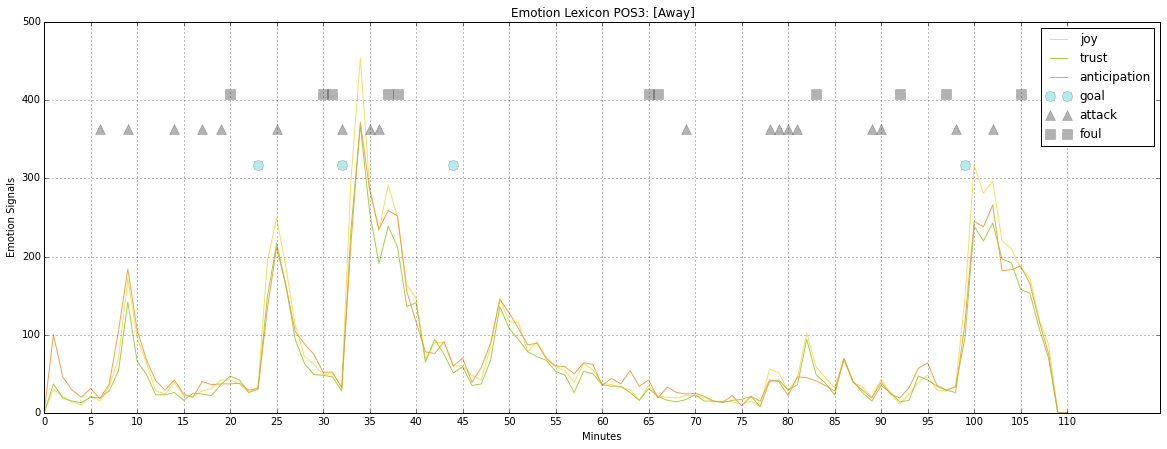

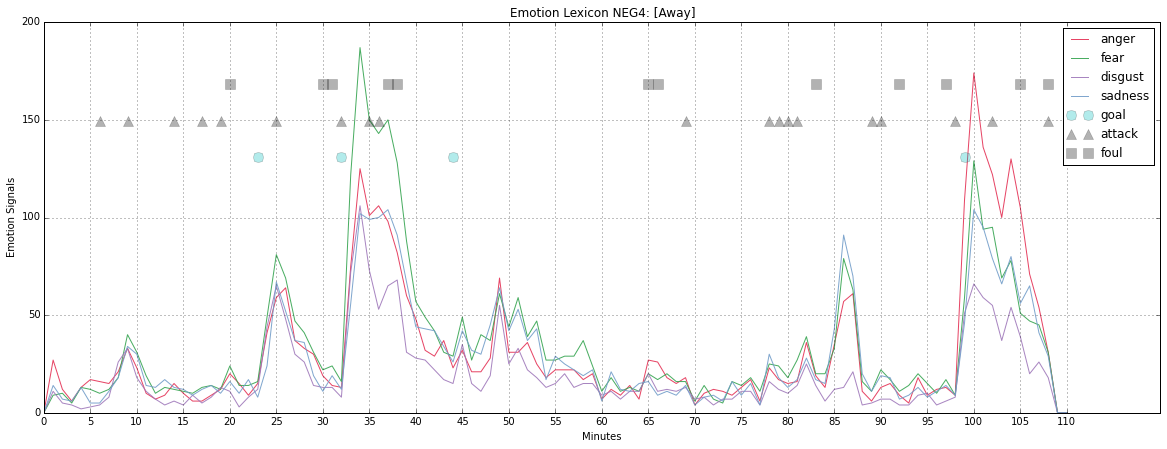

In [7]:
my_plot.HomeAwayPos3Neg4(dfFilterEmolexNonRtAway, goals_dic, attacks_dic_away, fouls_dic_away, title='Away')

In [ ]:
dfFilter[
    (dfFilter['side'] == 'home') &
    (dfFilter['status'] != 'retweet') &
    (dfFilter['ith_minute'] == '100')
]